In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df=pd.read_csv("/content/sample_data/mnist_test.csv")

In [21]:
df.shape

(9999, 785)

In [22]:
X = df.iloc[:, 1:].values   # pixels
y = df.iloc[:, 0].values   # labels

X = X.reshape(-1, 28, 28, 1) / 255.0


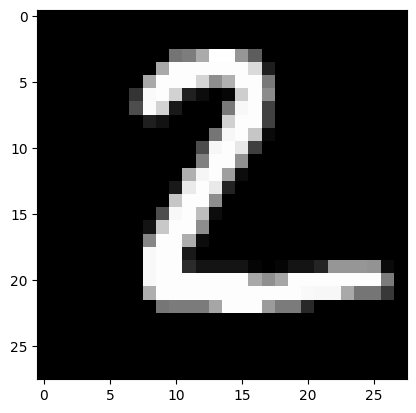

In [24]:
plt.imshow(X[0].squeeze(), cmap='gray')
plt.show()

In [26]:
print(y[0])

2


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
X_train.shape

(7999, 28, 28, 1)

In [29]:
y_train.shape

(7999,)

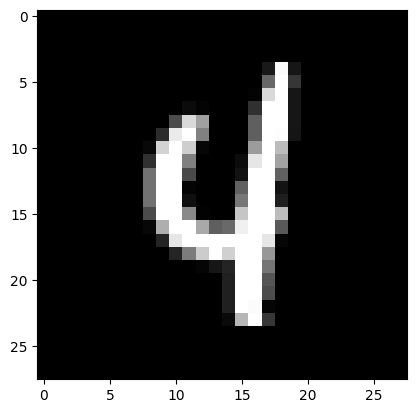

In [30]:
plt.imshow(X_test[0],cmap='gray')
plt.show()

In [32]:
print(y_test[0])

4


In [33]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [45]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the training and test labels
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

print(f"Shape of y_train_one_hot: {y_train_one_hot.shape}")
print(f"Shape of y_test_one_hot: {y_test_one_hot.shape}")

Shape of y_train_one_hot: (7999, 10)
Shape of y_test_one_hot: (2000, 10)


In [46]:
datagen = ImageDataGenerator()

batch_size = 32 # Re-define batch_size since the previous cell was deleted

train_data = datagen.flow(
    X_train,
    y_train_one_hot,
    batch_size=batch_size,
    shuffle=True
)

val_data = datagen.flow(
    X_test,
    y_test_one_hot,
    batch_size=batch_size,
    shuffle=False
)

In [47]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [49]:
epochs = 10

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs
)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5205 - loss: 1.4069

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.5213 - loss: 1.4046 - val_accuracy: 0.9405 - val_loss: 0.1907
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9138 - loss: 0.2722 - val_accuracy: 0.9590 - val_loss: 0.1340
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9424 - loss: 0.1798 - val_accuracy: 0.9545 - val_loss: 0.1289
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.9655 - loss: 0.1253 - val_accuracy: 0.9560 - val_loss: 0.1555
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9682 - loss: 0.1037 - val_accuracy: 0.9675 - val_loss: 0.1116
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9755 - loss: 0.0814 - val_accuracy: 0.9785 - val_loss: 0.0850
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9780 - loss: 0.0633 - val_accuracy: 0.9760 - val_loss: 0.0827
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9826 - loss: 0.0539 - val_accuracy: 0.

In [50]:
loss, acc = model.evaluate(val_data)
print(f"Validation Accuracy: {acc:.2f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9802 - loss: 0.0868
Validation Accuracy: 0.97
